In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import datasets
from tensorflow.keras.optimizers import SGD

In [6]:
df = pd.read_csv("Bank_churn_modelling.csv")

In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
df.isnull().sum() # Data Cleaning

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(10000, 14)

In [15]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1) #Dropping the columns which dont factor in the result.

In [16]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
cat = ['Geography','Gender', 'HasCrCard','IsActiveMember','Exited']
con = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']

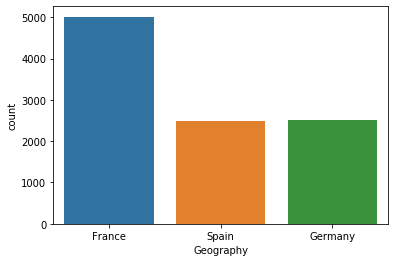

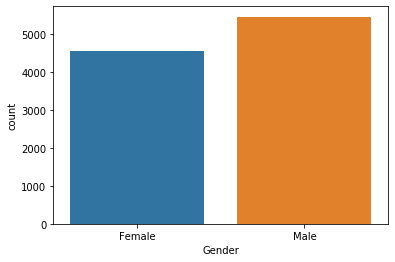

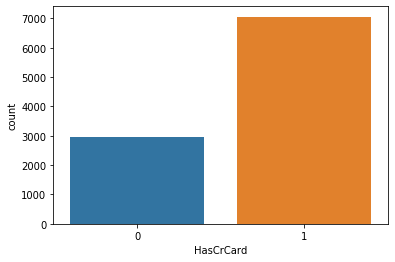

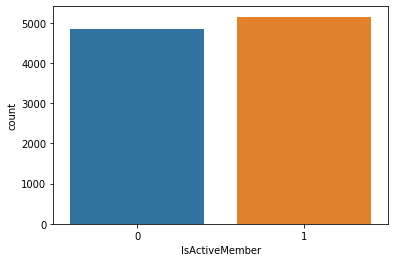

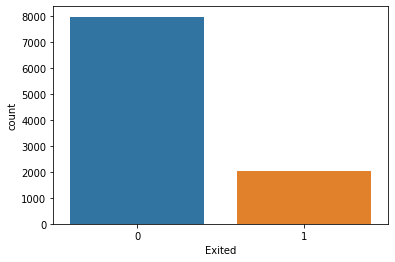

In [18]:
#Univariate Analysis
for i in cat:
  sns.countplot(x=i , data=df)
  plt.show()

Analysis :- Around 50% bank customers are from France. Around 20% of total bank customers left the bank . 30% of the total customers dont have credit card. Around 50% of customers are not using the bank services actively.


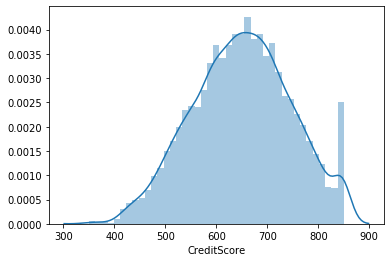

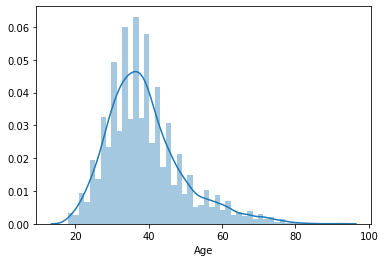

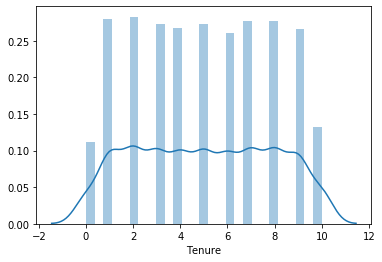

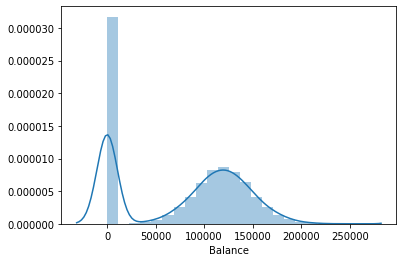

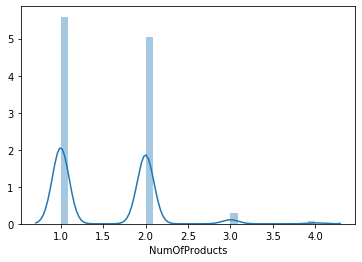

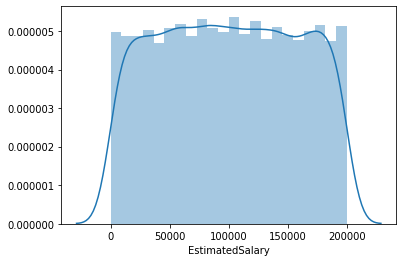

In [19]:
for i in con:
  sns.distplot(df[i])
  plt.show()

Analysis:
Majority of the credit score are in the range of 400 to 850. Majority of the bank customers age lie in between 20 to 40.
There are 2 types of customers in the bank:
1. Account balance is zero
2. Account balance lies in the range of 50k to 200 k.

Majority of bank customers are using one to two services of the bank.

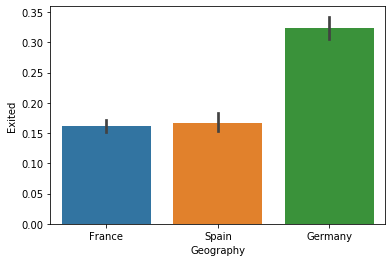

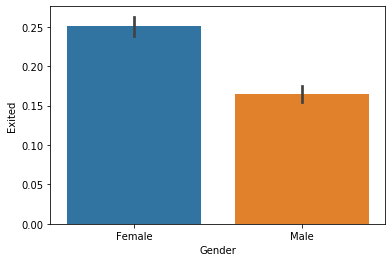

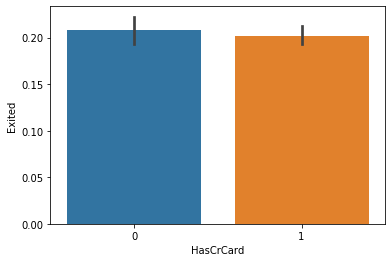

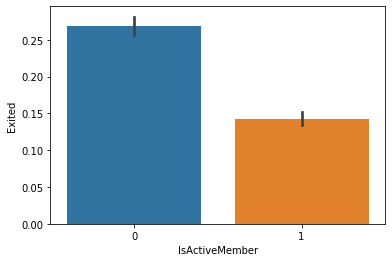

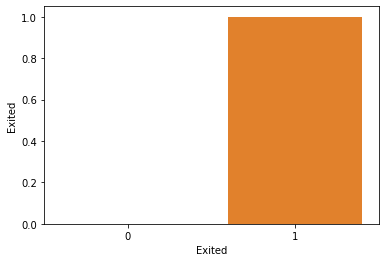

In [20]:
#Bivariate Analysis
for i in cat:
  sns.barplot(x=i,y='Exited',data=df)
  plt.show()

In [21]:
out = pd.crosstab(df["Exited"],df['Geography'],margins='True')
out

Geography,France,Germany,Spain,All
Exited,,,,
0,4204,1695,2064,7963
1,810,814,413,2037
All,5014,2509,2477,10000


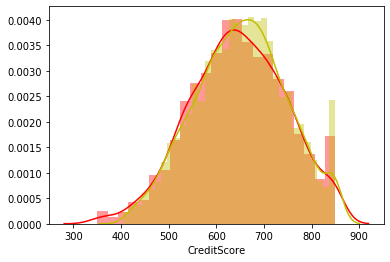

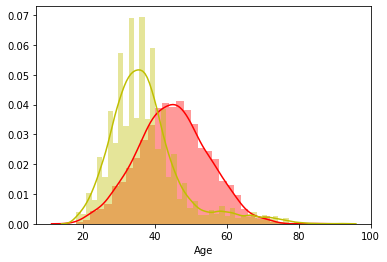

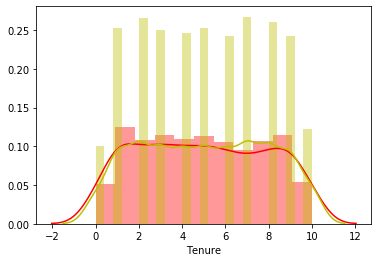

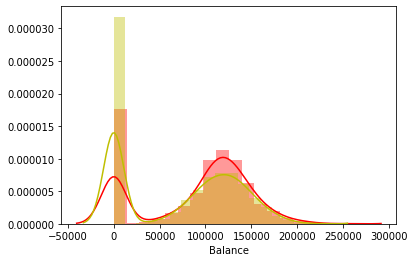

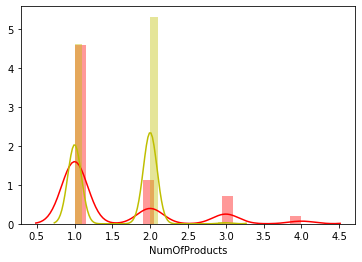

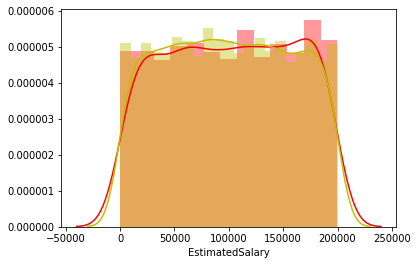

In [22]:
for i in con:
  sns.distplot(df[i][df['Exited']==1],color='r') # Customers who exited
  sns.distplot(df[i][df['Exited']==0],color='y') # Customers who didnt exit
  plt.show()

In [23]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [24]:
fea = ['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts','IsActiveMember']

In [25]:
x = df[fea]

In [26]:
y = df['Exited']

In [27]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [28]:
#Encoding
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()

In [29]:
x['Gender'] = l1.fit_transform(df["Gender"])

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
x.head() # 0 is for female , 1 is for male

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,0,42,0.00,1,1
1,608,Spain,0,41,83807.86,1,1
2,502,France,0,42,159660.80,3,0
3,699,France,0,39,0.00,2,0
4,850,Spain,0,43,125510.82,1,1


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , OneHotEncoder

In [32]:
encoder = ColumnTransformer([("one",OneHotEncoder(),[1]),("sc",StandardScaler(),[0,3,4,5])],remainder = 'passthrough')

In [33]:
x1 = encoder.fit_transform(x)

In [34]:
x1 = pd.DataFrame(x1)
x1.head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,-0.326221,0.293517,-1.225848,-0.911583,0.0,1.0
1,0.0,0.0,1.0,-0.440036,0.198164,0.117350,-0.911583,0.0,1.0
2,1.0,0.0,0.0,-1.536794,0.293517,1.333053,2.527057,0.0,0.0
3,1.0,0.0,0.0,0.501521,0.007457,-1.225848,0.807737,0.0,0.0
4,0.0,0.0,1.0,2.063884,0.388871,0.785728,-0.911583,0.0,1.0


In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =  train_test_split(x1,y,test_size=0.2)

In [36]:
from sklearn.neural_network import MLPClassifier
algo = MLPClassifier(hidden_layer_sizes=(100,100))

In [37]:
algo.fit(xtrain,ytrain) # Training the model

D:\Software\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [38]:
ypred = algo.predict(xtest) #Testing the model

In [42]:
from sklearn.metrics import accuracy_score #Checking the accuracy of our model
accuracy_score(ytest,ypred)

0.8385

In [43]:
import joblib #Used to save the model

In [54]:
joblib.dump(algo, 'bank.pkl', compress=1)

['bank.pkl']

In [48]:
new_customer = [[500,"France",1,30,78455,1,0]]

In [49]:
new = encoder.transform(new_customer)#Trnasformation is done to send the data to our model.

In [50]:
new

array([[1.0, 0.0, 0.0, -1.5574877316448745, -0.8507256655188732,
        0.03155915167518979, -0.9115834940401767, 1, 0]], dtype=object)

In [51]:
algo.predict(new) # o - High probablity to not exit and 1 - High probablity to exit

array([0], dtype=int64)

In [52]:
algo.predict_proba(new) # Probablity the customer will not exit and customer that will exit the bank

array([[0.98695207, 0.01304793]])

In [55]:
joblib.dump(encoder,'bank_encoder.pkl')

['bank_encoder.pkl']